<a href="https://colab.research.google.com/github/Heytthere/PythonProjects/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bcancer_df=load_breast_cancer()

In [ ]:
df=pd.DataFrame(bcancer_df.data,columns=bcancer_df.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df  # Features
y = bcancer_df.target # Target variable (from the original dataset)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [30]:
model=LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred=model.predict(X_test)

In [34]:
acc_score=accuracy_score(y_test,pred)
acc_score

0.9649122807017544

In [36]:
prec=precision_score(y_test,pred)
prec

0.958904109589041

In [37]:
f1_sc=f1_score(y_test,pred)
f1_sc

0.9722222222222222

In [38]:
recall=recall_score(y_test,pred)
recall

0.9859154929577465

In [39]:
confusion_matrix(y_test,pred)


array([[40,  3],
       [ 1, 70]])

In [40]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
pred_knn=kn.predict(X_test)
pred_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [44]:
acc_score_knn=accuracy_score(y_test,pred_knn)
acc_score_knn

0.956140350877193

In [45]:
precision_score_knn=precision_score(y_test,pred_knn)
precision_score_knn


0.9342105263157895

<Axes: >

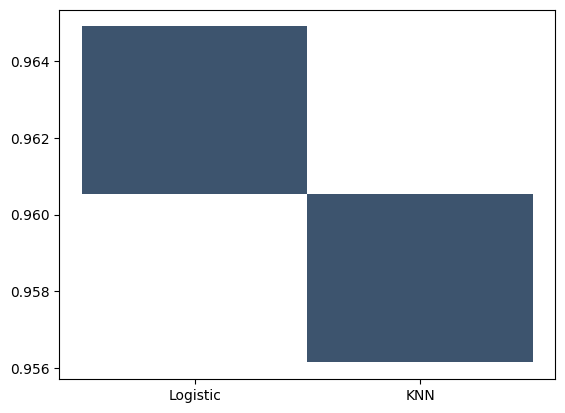

In [54]:
graph=[acc_score,acc_score_knn]
label=['Logistic','KNN']
#plt.bar(label,graph)
#sns.histplot(label,graph)
sns.histplot(x=label,y=graph)

In [55]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
Svc_pred=svm.predict(X_test)
acc_score_svc=accuracy_score(y_test,Svc_pred)
acc_score_svc

0.956140350877193

In [57]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
Decision_pred=DecisionTree.predict(X_test)
acc_score_dt=accuracy_score(y_test,Decision_pred)
acc_score_dt

0.9385964912280702

<BarContainer object of 2 artists>

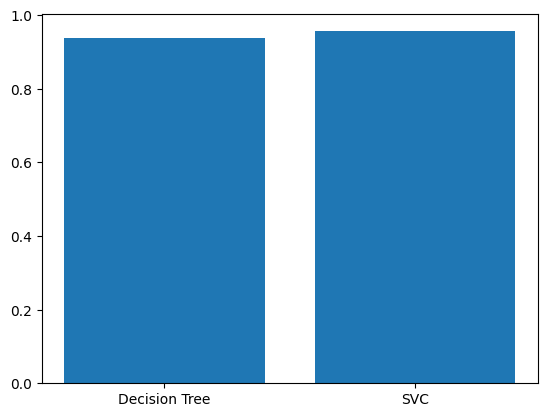

In [59]:
graph=[acc_score_dt,acc_score_svc]
label=['Decision Tree','SVC']
plt.bar(label,graph)

<BarContainer object of 4 artists>

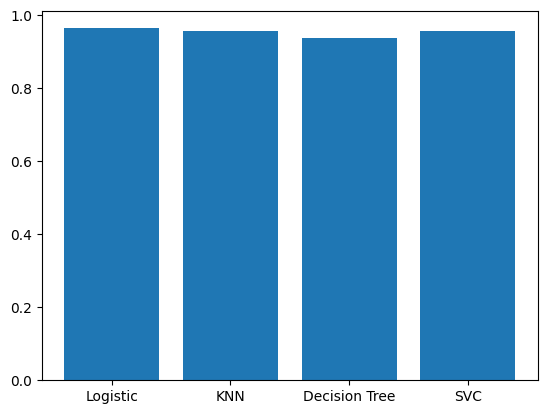

In [60]:
graph=[acc_score,acc_score_knn,acc_score_dt,acc_score_svc]
label=['Logistic','KNN','Decision Tree','SVC']
plt.bar(label,graph)